## Python Registration initialization with manual offset

In this notebook I try to figure out how to initialize an image registration task in SimpleITK when the automatic initializer fails. This is due to a large xy offset between the STED and TEM frames. The first idea is to input a fixed xy-offset and a rotation angle. Let's start by reading a couple of images.

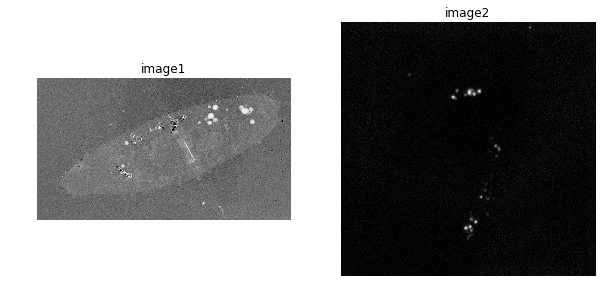

In [4]:
%matplotlib inline

import SimpleITK as sitk
import os
from supertomo.ui import show
from supertomo.utils import itkutils

working_directory = "/home/sami/Data/2016-CLEM/2016_07_CLEM_Live_Data"
em_image_path = os.path.join(
    working_directory, 
    "STED_TEM_Grid_1_H3_3.mha"
)
sted_image_path = os.path.join(
    working_directory, 
    "TEM_Grid_1_H3_3_ymirrored_inverted.mha"
)
em_image = sitk.ReadImage(em_image_path)
sted_image = sitk.ReadImage(sted_image_path)

show.display_2d_images(sted_image, em_image)

Then let's rotate the *image2* i.e. the em_image to get a bit better idea of the situation.

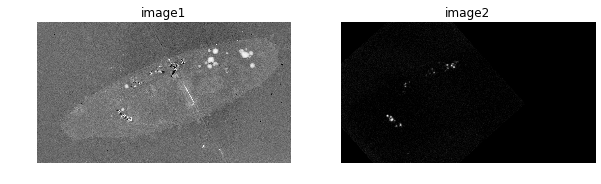

In [17]:
rotation = 2.3

transform = sitk.Euler2DTransform()
transform.SetAngle(rotation)
transform.SetCenter(
    itkutils.calculate_center_of_image(em_image)
)

em_rotated = itkutils.resample_image(
    em_image, 
    transform, 
    reference=sted_image
)
show.display_2d_images(sted_image, em_rotated)

Let's then try to get the TEM frame roughly at a correct position. As it happens, with Euler2DTransform the positive y direction seems to be down, whereas positive x direction is left.

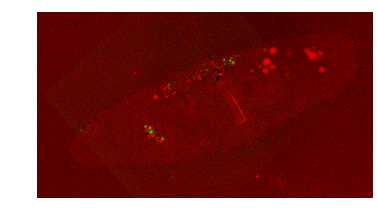

In [18]:
x_offset = -5
y_offset = 3

transform.SetTranslation((y_offset, x_offset))

em_rotated_and_translated = itkutils.resample_image(
    em_image, 
    transform, 
    reference=sted_image
)
show.display_2d_image_overlay(sted_image, em_rotated_and_translated)

As it turns out, with such initialization the registration seems work fine. The next step would be to add a landmark based initialization, which should make the offset definition easier.